<h4>Importing required packages

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kovor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h4>Reading the dataset

In [2]:
data = pd.read_csv("subreddit.csv", quoting = 3)
data

,Unnamed: 0,title,score,id,flairs,url,n_comments,created,body,anxious
0,0,Anxiety is a bitch This advice really helped me,2,pv9nxf,Helpful Tips!,https://www.reddit.com/r/Anxiety/comments/pv9n...,1,2021-09-25,And when I say bitch I mean it in the sense th...,1
1,1,Is anyone else getting super frustrated and ti...,1,pv9fyd,Advice Needed,https://www.reddit.com/r/Anxiety/comments/pv9f...,0,2021-09-25,Hey guys I ve suffered with anxiety for years...,1
2,2,social butterfly to recluse,1,pv987s,Venting,https://www.reddit.com/r/Anxiety/comments/pv98...,0,2021-09-25,my social anxiety is horrible i can handle ha...,1
3,3,ever since school started i ve been very anxious,0,pv95xx,Work/School,https://www.reddit.com/r/Anxiety/comments/pv95...,6,2021-09-25,every morning i wake up with stomach pains and...,1
4,4,Don t have a safe space safe person to talk to...,1,pv90uy,Needs A Hug/Support,https://www.reddit.com/r/Anxiety/comments/pv90...,0,2021-09-25,For context I m a high school senior and I m a...,1
...,...,...,...,...,...,...,...,...,...,...
495,495,Cleaned My Room But Still Anxious,1,ptpazf,Venting,https://www.reddit.com/r/Anxiety/comments/ptpa...,0,2021-09-23,It often gets suggested to clean your room bec...,1
496,496,My anxiety began health,1,ptp3d7,Therapy,https://www.reddit.com/r/Anxiety/comments/ptp3...,1,2021-09-23,My anxiety began when i moved away from home t...,1
497,497,well now im scared,1,ptp2yk,Medication,https://www.reddit.com/r/Anxiety/comments/ptp2...,0,2021-09-23,Found out there s moderate interactions betwee...,1
498,498,I had an anxiety attack today and I feel reall...,1,ptozsl,Needs A Hug/Support,https://www.reddit.com/r/Anxiety/comments/ptoz...,2,2021-09-23,So my friend told me she might be dropping out...,1


<h4>Dropping columns that are not required according to the problem statement provided

In [3]:
data = data.drop(['Unnamed: 0','title','score','id','flairs','n_comments','created','url'],axis = 1)

In [4]:
data

,body,anxious
0,And when I say bitch I mean it in the sense th...,1
1,Hey guys I ve suffered with anxiety for years...,1
2,my social anxiety is horrible i can handle ha...,1
3,every morning i wake up with stomach pains and...,1
4,For context I m a high school senior and I m a...,1
...,...,...
495,It often gets suggested to clean your room bec...,1
496,My anxiety began when i moved away from home t...,1
497,Found out there s moderate interactions betwee...,1
498,So my friend told me she might be dropping out...,1


<h4> Visualizing the skewness of the target data

c:\users\kovor\pycharmprojects\subreddit\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='anxious', ylabel='count'>

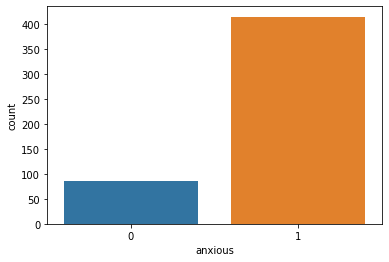

In [5]:
import seaborn as sns
sns.countplot(data['anxious'])

<h4>Cleaning the text and Creating Corpus
<h5>Steps used to clean text<br><br>
1)Stemming the sentences<br>
2)Removing stopwords<br>

In [6]:
corpus = []
for i in range(0,500):
    submission = data["body"][i]
    submission = str(submission)
    submission = submission.split()
    ps = PorterStemmer()
    submission = [ps.stem(word) for word in submission if not word in set(stopwords.words('english'))]
    submission = ' '.join(submission)
    corpus.append(submission)

<h4>Vectorizing or Tokenizing the corpus to build a sparse matrix (Bag of words)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data['anxious']

<h4>Test Train Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

<h4>Using GaussianNB

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
cm

array([[  8,  30],
       [  5, 157]], dtype=int64)

In [13]:
TP_NB, TN_NB, FP_NB, FN_NB = 157, 8, 5, 30
Accuracy_NB = (TP_NB +TN_NB) / (TP_NB + TN_NB + FP_NB + FN_NB)
print("Accuracy ", Accuracy_NB)
Precision_NB = TP_NB / (TP_NB + FP_NB)
print("Precision ", Precision_NB)
Recall_NB = TP_NB / (TP_NB + FN_NB)
print("Recall ", Recall_NB)
F1_Score_NB = 2 * Precision_NB * Recall_NB / (Precision_NB + Recall_NB)
print("F1_score", F1_Score_NB)

Accuracy  0.825
Precision  0.9691358024691358
Recall  0.839572192513369
F1_score 0.8997134670487106


<h4>Using Decision TreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_DT = classifier.predict(X_test)

In [15]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[  7,  31],
       [ 28, 134]], dtype=int64)

In [16]:
TP_DT = 134
TN_DT = 7
FP_DT = 28
FN_DT = 31
Accuracy_DT = (TP_DT + TN_DT) / (TP_DT + TN_DT + FP_DT + FN_DT)
print("Accuracy ", Accuracy_DT)
Precision_DT = TP_DT / (TP_DT + FP_DT)
print("Precision ", Precision_DT)
Recall_DT = TP_DT / (TP_DT + FN_DT)
print("Recall ", Recall_DT)
F1_Score_DT = 2 * Precision_DT * Recall_DT / (Precision_DT + Recall_DT)
print("F1_score", F1_Score_DT)

Accuracy  0.705
Precision  0.8271604938271605
Recall  0.8121212121212121
F1_score 0.8195718654434251


<h4>Using Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_RF = classifier.predict(X_test)

In [18]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
cm_RF

array([[  0,  38],
       [  0, 162]], dtype=int64)

In [19]:
TP_RF, TN_RF, FP_RF, FN_RF = 162, 0, 0, 38
Accuracy_RF = (TP_RF + TN_RF) / (TP_RF + TN_RF + FP_RF + FN_RF)
print("Accuracy ", Accuracy_RF)
Precision_RF = TP_RF / (TP_RF + FP_RF)
print("Precision ", Precision_RF)
Recall_RF = TP_RF / (TP_RF + FN_RF)
print("Recall ", Recall_RF)
F1_Score_RF = 2 * Precision_RF * Recall_RF / (Precision_RF + Recall_RF)
print("F1_score", F1_Score_RF)

Accuracy  0.81
Precision  1.0
Recall  0.81
F1_score 0.8950276243093923


<h4>Visualising the accuracy of the various models used

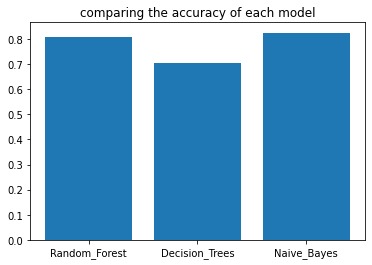

In [20]:
import matplotlib.pyplot as plt
Accuracy = [Accuracy_RF, Accuracy_DT, Accuracy_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model')
plt.show()

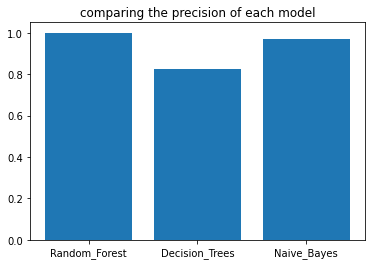

In [21]:
Precision = [Precision_RF, Precision_DT, Precision_NB]
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('comparing the precision of each model')
plt.show()

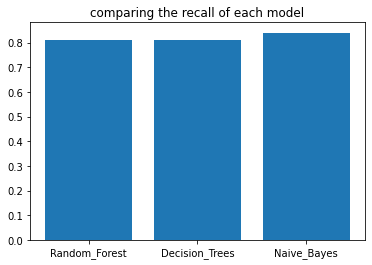

In [22]:
Recall = [Recall_RF, Recall_DT, Recall_NB]
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('comparing the recall of each model')
plt.show()

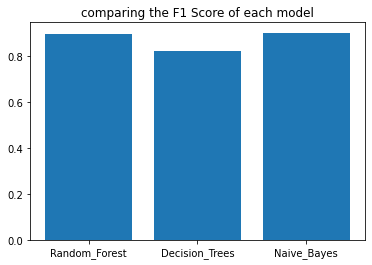

In [23]:
F1_Score = [F1_Score_RF, F1_Score_DT, F1_Score_NB]
F1_Score_pos = np.arange(len(Methods))
plt.bar(F1_Score_pos, F1_Score)
plt.xticks(F1_Score_pos, Methods)
plt.title('comparing the F1 Score of each model')
plt.show()

<h3>Inference</h3>
1)First and the foremost thing, 500 rows of data was not really enough.
Most of the submissions on reddit were from people who felt anxious, as shown in the count plot.
Hence, caused the data to be skewed.<br>
2)The confusion matrix of Random Forest clearly shows that the model failed to
predict non-anxious submissions. It might have worked well if the data was less
skewed.<br>
3)So the comparison finally comes down to Decision Trees and Naive_Bayes.
Looking at the bar plots above, Naive_bayes is a clear winner. But again, less skewed data
could have provided different results.<br>